In [1]:
# Import dependencies
import pandas as pd
%matplotlib notebook 
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Import merged_resedential_electricity_income.csv
file = 'merged_resedential_electricity_income.csv'
income_kwh_mean = pd.read_csv(file)

In [3]:
# Group income_kwh_mean by 'COMMUNITY AREA NAME'
area_income_mean = income_kwh_mean.groupby('COMMUNITY AREA NAME').mean()

In [4]:
# Reset index of area_income_mean
area_income_mean.reset_index()

# Find the min and max of the mean per capita incomes of each neighborhood
# Clean up DataFrame and drop 'Unnamed: 0' column
area_income_mean_sum = area_income_mean.describe()
area_income_mean_sum.drop(columns='Unnamed: 0', inplace=True)
area_income_mean_sum

,PER CAPITA INCOME,KWH MEAN 2010,TOTAL POPULATION
count,77.000000,7.700000e+01,77.000000
mean,25106.740260,3.817248e+04,158.946880
std,14952.672297,1.636843e+05,306.542333
min,8535.000000,8.814124e+03,45.878652
25%,15467.000000,9.966186e+03,77.582851
50%,20489.000000,1.142607e+04,99.391192
75%,29026.000000,1.545234e+04,142.776645
max,87163.000000,1.431448e+06,2677.166667


In [5]:
# Create bins to group results into per capita income brackets
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]

# Create names for the bins
incomes = ["0 to 10k", "10k to 20k", "20 to 30k", "30 to 40k",
           "40 to 50k", "50 to 60k", "60 to 70k", "70 to 80k",
           "80 to 90k"]

In [6]:
# Slice area_income_mean and place it into income bins
# Place data series into a new column inside of area_income_mean
area_income_mean['PER CAPITA INCOME GROUPS'] = pd.cut(area_income_mean["PER CAPITA INCOME"], bins, labels=incomes)

In [7]:
# Make note of the overview of 'KWH MEAN 2010' for all neighborhoods
area_income_mean['KWH MEAN 2010'].describe()

count    7.700000e+01
mean     3.817248e+04
std      1.636843e+05
min      8.814124e+03
25%      9.966186e+03
50%      1.142607e+04
75%      1.545234e+04
max      1.431448e+06
Name: KWH MEAN 2010, dtype: float64

In [8]:
# Group area_income_mean to reflect income groups
per_capita_income_grp = area_income_mean.groupby("PER CAPITA INCOME GROUPS").mean()

# Check per_capita_income_grp DataFrame
per_capita_income_grp = per_capita_income_grp[['KWH MEAN 2010']]
per_capita_income_grp

,KWH MEAN 2010
PER CAPITA INCOME GROUPS,
0 to 10k,82570.041515
10k to 20k,11667.681066
20 to 30k,14313.788337
30 to 40k,18096.580741
40 to 50k,18313.967952
50 to 60k,17977.264738
60 to 70k,811539.341970
70 to 80k,26873.208014
80 to 90k,144505.345102


In [9]:
# Reset index of per_capita_incom_grp
# (will combine with other DataFrams later)
# Make note of how 'KWH MEAN 2010' changed for income brackets
per_capita_income_grp.reset_index(inplace=True)
per_capita_income_grp['KWH MEAN 2010'].describe()

count         9.000000
mean     127317.468826
std      260398.091295
min       11667.681066
25%       17977.264738
50%       18313.967952
75%       82570.041515
max      811539.341970
Name: KWH MEAN 2010, dtype: float64

In [10]:
# Check neighborhood count per income bracket
count_per_capita_income = area_income_mean.groupby("PER CAPITA INCOME GROUPS").count()

# Just take one column from count_per_capita_income to get count
count_per_capita_income = count_per_capita_income[['PER CAPITA INCOME']]

# Reset index to merge DataFrame later
# Rename column to reflect actual data
count_per_capita_income.reset_index(inplace=True)
count_per_capita_income.rename(columns={'PER CAPITA INCOME': 'NEIGHBORHOOD COUNT'}, inplace=True)
count_per_capita_income.head(2)

,PER CAPITA INCOME GROUPS,NEIGHBORHOOD COUNT
0,0 to 10k,2
1,10k to 20k,34


In [11]:
# Check total population
# Taking the sum of total population within income brackets
## from the mean total population per community area
total_population = area_income_mean.groupby("PER CAPITA INCOME GROUPS").sum()

# Only select 'TOTAL POPULATION' column
# Reset indext, so DataFrame can be merged later
# Check total_population DataFrame
total_population = total_population[['TOTAL POPULATION']]
total_population.reset_index(inplace=True)
total_population.head(2)

,PER CAPITA INCOME GROUPS,TOTAL POPULATION
0,0 to 10k,212.983907
1,10k to 20k,3524.433807


In [12]:
# Combine DataFrames:
# per_capita_income_grp, count_per_capita_income, total_population

summary_meanKWH_residential = per_capita_income_grp
summary_meanKWH_residential['NEIGHBORHOOD COUNT'] = count_per_capita_income['NEIGHBORHOOD COUNT']
summary_meanKWH_residential['TOTAL POPULATION'] = total_population['TOTAL POPULATION']

summary_meanKWH_residential

,PER CAPITA INCOME GROUPS,KWH MEAN 2010,NEIGHBORHOOD COUNT,TOTAL POPULATION
0,0 to 10k,82570.041515,2,212.983907
1,10k to 20k,11667.681066,34,3524.433807
2,20 to 30k,14313.788337,23,2492.278693
3,30 to 40k,18096.580741,9,1415.769142
4,40 to 50k,18313.967952,3,293.739395
5,50 to 60k,17977.264738,2,247.379738
6,60 to 70k,811539.341970,2,3317.287879
7,70 to 80k,26873.208014,1,167.430082
8,80 to 90k,144505.345102,1,567.607143


<IPython.core.display.Javascript object>


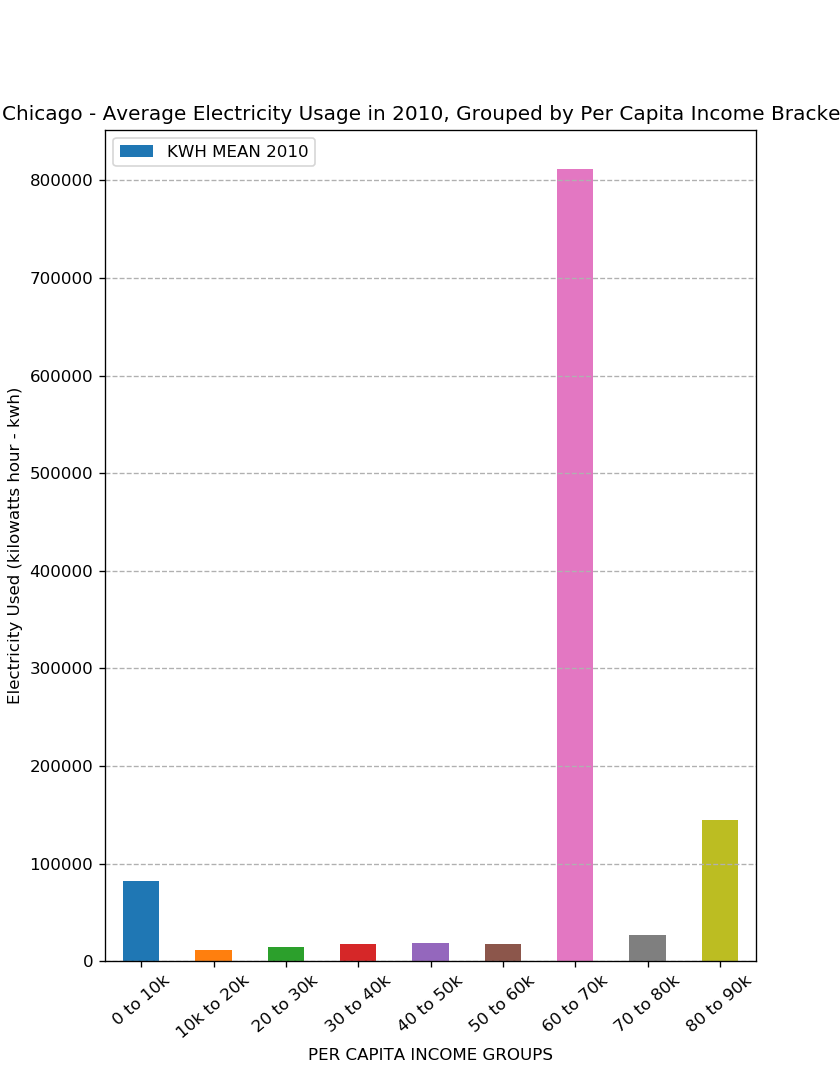

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [23]:
# Create bar plot from summary_meanKWH_residential 
# Compare income brackets to KWH MEAN 2010

# Create plot for per_capita_income_grp 
x = 'PER CAPITA INCOME GROUPS'
y = 'KWH MEAN 2010'
title = 'Chicago - Average Electricity Usage in 2010, Grouped by Per Capita Income Brackets'
per_capita_income_grp.plot(kind='bar', x=x, y=y, figsize=(7,9),
                           rot=40, title=title)

# Add y-axix lines to make reading graph easier
plt.gca().yaxis.grid(True, linestyle='--')

# Adjust location of legend
plt.legend(loc='upper left')

# y label
plt.ylabel('Electricity Used (kilowatts hour - kwh)')
plt.tight_layout

In [24]:
# Save figure
plt.savefig('Avg_KWH_Per_Capita.png')